In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [ ]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_India = df_can.loc[['India'], years].transpose()

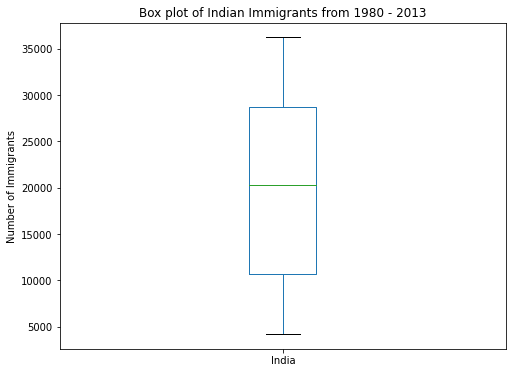

In [ ]:
df_India.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

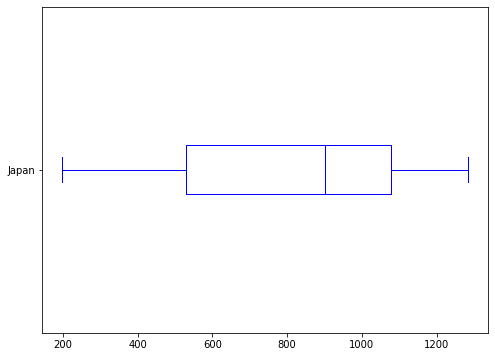

In [ ]:
df_can.loc[['Japan'], years].transpose().plot(kind='box', figsize=(8, 6), color='blue', vert=False)

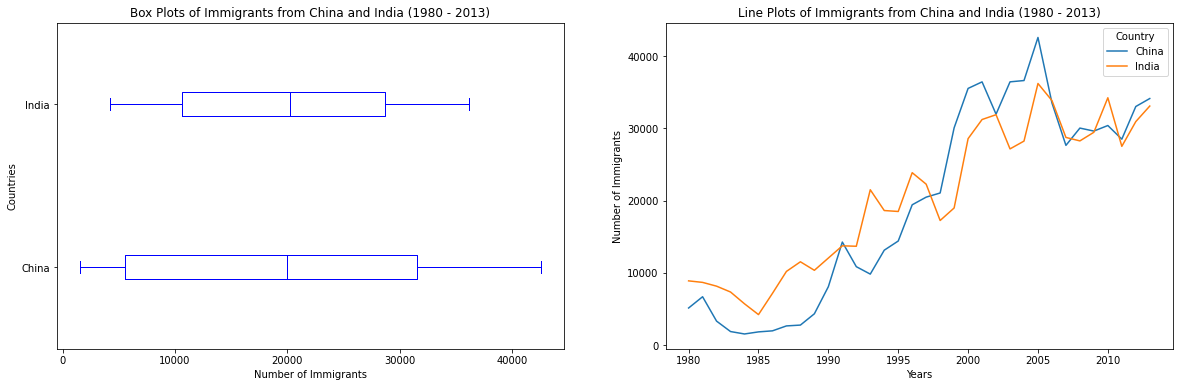

In [ ]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_can.loc[['China', 'India'], years].transpose().plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_can.loc[['China', 'India'], years].transpose().plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [ ]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15.head(5)

year_80 = list(map(str, range(1980,1990)))
year_90 = list(map(str, range(1990,2000)))
year_00 = list(map(str, range(2000,2010)))

df_80s = df_top15.loc[:, year_80].sum(axis=1) 
df_90s = df_top15.loc[:, year_90].sum(axis=1) 
df_00s = df_top15.loc[:, year_00].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

Text(0.5, 1.0, 'Immigration from top 15 countries for decades 80s, 90s and 2000s')

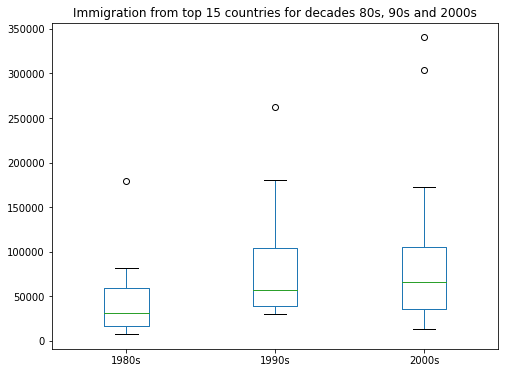

In [ ]:
new_df.plot(kind='box', figsize=(8,6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

In [ ]:
# let's check how many entries fall above the outlier threshold 
print(new_df[new_df['2000s']> 209611.5])
print(new_df[new_df['1990s']> 209611.5])

         1980s   1990s   2000s
Country                       
India    82154  180395  303591
China    32003  161528  340385
                                                     1980s   1990s  2000s
Country                                                                  
United Kingdom of Great Britain and Northern Ir...  179171  261966  83413
